ASSIGNMENT-1 CS5691 PRATHAM SUNKAD ME21B145

Importing Libraries

In [4]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

c:\Users\Pratham Sunkad\anaconda3\envs\pytorch\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Downloading the MNIST Dataset

In [5]:
# Define a custom transform
to_numpy = torchvision.transforms.Lambda(lambda x: x.numpy())

# Load the MNIST dataset
mnist_train = torchvision.datasets.MNIST(root='./data',
                                         train=True,
                                         download=True,
                                         transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(), to_numpy]))

In [6]:
len(mnist_train)

60000

In [7]:
mnist_train[0][0].shape

(1, 28, 28)

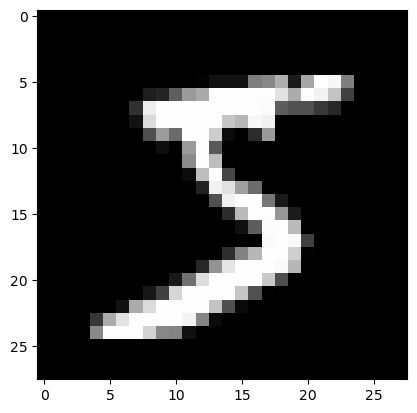

In [8]:
plt.imshow(mnist_train[0][0].squeeze(),cmap='gray')

DEFINING FUNCTIONS TO RUN PCA

In [9]:
# This function creates a numpy array of size (28*28,1000) containing 100 images of each digit(0-9)
def create_data(mnist_train):
    data = np.zeros((28*28,1000))
    label = np.zeros(1000)
    count = np.zeros(10)
    i = 0
    while min(count) < 100:
        img = mnist_train[i][0]
        val = mnist_train[i][1]
        sum = int(np.sum(count))
        if(count[val] == 100):
            i+=1
            continue
        else:
            data[:,sum] = img.reshape(28*28)
            count[val] += 1
            label[sum] = val
            i+=1
    return data, label

In [2]:
# to sort the array of eigenvectors and eigenvalues in descending order
def bubble_sort(arr1, arr2):
    n = len(arr1)

    for i in range(n):
        for j in range(0, n - i - 1):
        
            if arr1[j] < arr1[j + 1]:
                arr1[j], arr1[j + 1] = arr1[j + 1], arr1[j]
                for k in range(n):
                    arr2[k,j], arr2[k,j + 1] = arr2[k,j + 1], arr2[k,j]
                
    return arr1, arr2

In [10]:
# checking if bubble sort is working
arr1 = np.array([3,4,2])
arr2 = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(bubble_sort(arr1, arr2)[0], bubble_sort(arr1, arr2)[1])

[4 3 2] [[2 1 3]
 [5 4 6]
 [8 7 9]]


In [11]:
# Function to calculate the eigenvalues, eigenvectors, and mean of the data
def cal_eigen(data):
    # calculate the mean of the data
    data_mean = np.mean(data, axis=1)
    # centre the data
    data = data - data_mean.reshape(-1,1)
    # calculate the covariance matrix
    cov = (1/data.shape[1])*(data @ data.T)
    # calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    # sort the eigenvectors and eigenvalues in descending order
    eigenvalues, eigenvectors = bubble_sort(eigenvalues, eigenvectors)
    # return the eigenvalues, eigenvectors, and mean
    return eigenvalues, eigenvectors, data_mean

In [12]:
# Reconstructing the data using top d eigenvectors and storing the data in a numpy array of shape (28*28,1000)
def reconstruct_data(data, eigenvectors, data_mean, d):
    reconstruct_data = np.zeros((data.shape[0],data.shape[1]))
    for i in range(data.shape[1]):
        for k in range(d):
            reconstruct_data[:,i] += np.dot(data[:,i]-data_mean, eigenvectors[:,k])*eigenvectors[:,k]
        reconstruct_data[:,i] += data_mean
    return reconstruct_data

Creating Data and Storing Eigenvectors & Eigenvalues

In [13]:
data, label = create_data(mnist_train)

In [12]:
data_eigenvalues, data_eigenvectors, data_mean = cal_eigen(data)

In [13]:
data_eigenvectors.shape

(784, 784)

DISPLAYING THE PRINCIPAL COMPONENTS

Displaying the first 10 Eigenvectors with highest Eigenvalues

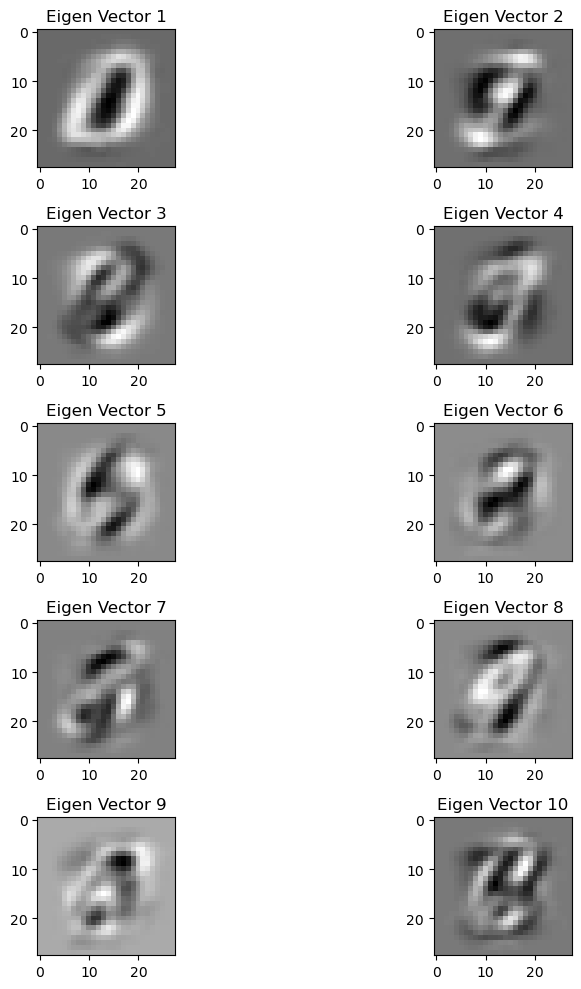

In [14]:
fig = plt.figure(figsize = (10,10))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('Eigen Vector '+str(i+1))
    plt.imshow(data_eigenvectors[:,i].reshape(28,28),cmap='gray')
plt.tight_layout()
plt.show()

Displaying the last 10 Eigenvectors with the lowest Eigenvalues

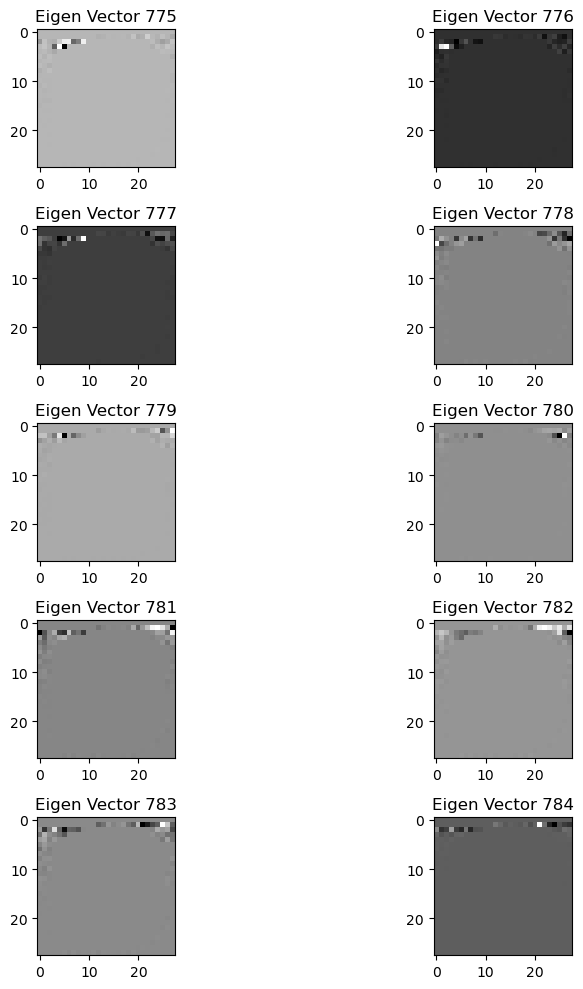

In [15]:
fig = plt.figure(figsize = (10,10))
for i in range(774,784):
    plt.subplot(5,2,i-773)
    plt.title('Eigen Vector '+str(i+1))
    plt.imshow(data_eigenvectors[:,i].reshape(28,28),cmap='gray')
plt.tight_layout()
plt.show()

VARIANCE ANALYSIS

In [16]:
# Calculating variance explained by each eigenvector and storing it in a numpy array
variance_explained = np.zeros(784)
for i in range(784):
    variance_explained[i] = (data_eigenvalues[i]/np.sum(data_eigenvalues))*100

Text(0, 0.5, ' % Variance Explained')

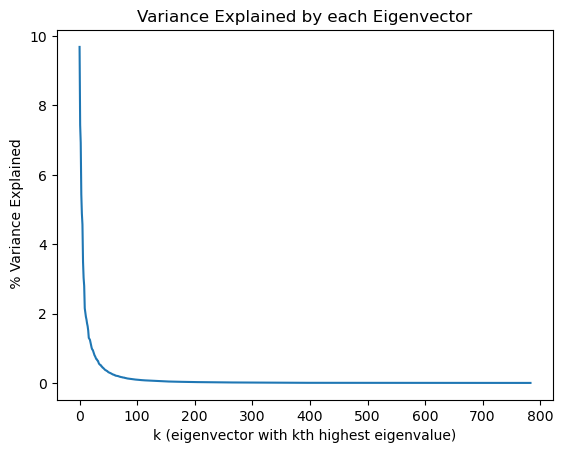

In [35]:
# Plotting the variance explained by each eigenvector
plt.plot(variance_explained)
plt.title('Variance Explained by each Eigenvector')
plt.xlabel('k (eigenvector with kth highest eigenvalue)')
plt.ylabel(' % Variance Explained')

# Variance explained by the top eigenvector is 9.68%

In [18]:
# Printing the array containing variance % explained by each eigenvector
variance_explained

array([ 9.68658171e+00,  7.43790040e+00,  6.92429790e+00,  5.43625497e+00,
        4.88086688e+00,  4.56733529e+00,  3.49209319e+00,  3.03156851e+00,
        2.80030978e+00,  2.15213188e+00,  2.03136382e+00,  1.90583138e+00,
        1.82636939e+00,  1.71574175e+00,  1.63603771e+00,  1.51006366e+00,
        1.29900398e+00,  1.27080852e+00,  1.24193643e+00,  1.16298918e+00,
        1.07842844e+00,  1.01026596e+00,  9.64027050e-01,  9.47815324e-01,
        8.99682854e-01,  8.53794913e-01,  7.94955765e-01,  7.66271319e-01,
        7.23378360e-01,  6.86732004e-01,  6.81816740e-01,  6.44107774e-01,
        6.34615321e-01,  5.82394341e-01,  5.49033664e-01,  5.31237127e-01,
        5.15853214e-01,  5.10996462e-01,  4.76860532e-01,  4.69870567e-01,
        4.39947441e-01,  4.33637541e-01,  4.15172485e-01,  3.94717523e-01,
        3.80790814e-01,  3.67690843e-01,  3.62186585e-01,  3.48002041e-01,
        3.41697375e-01,  3.24095623e-01,  3.09378940e-01,  3.02744740e-01,
        2.96896415e-01,  

RECONSTRUCTING THE DATA

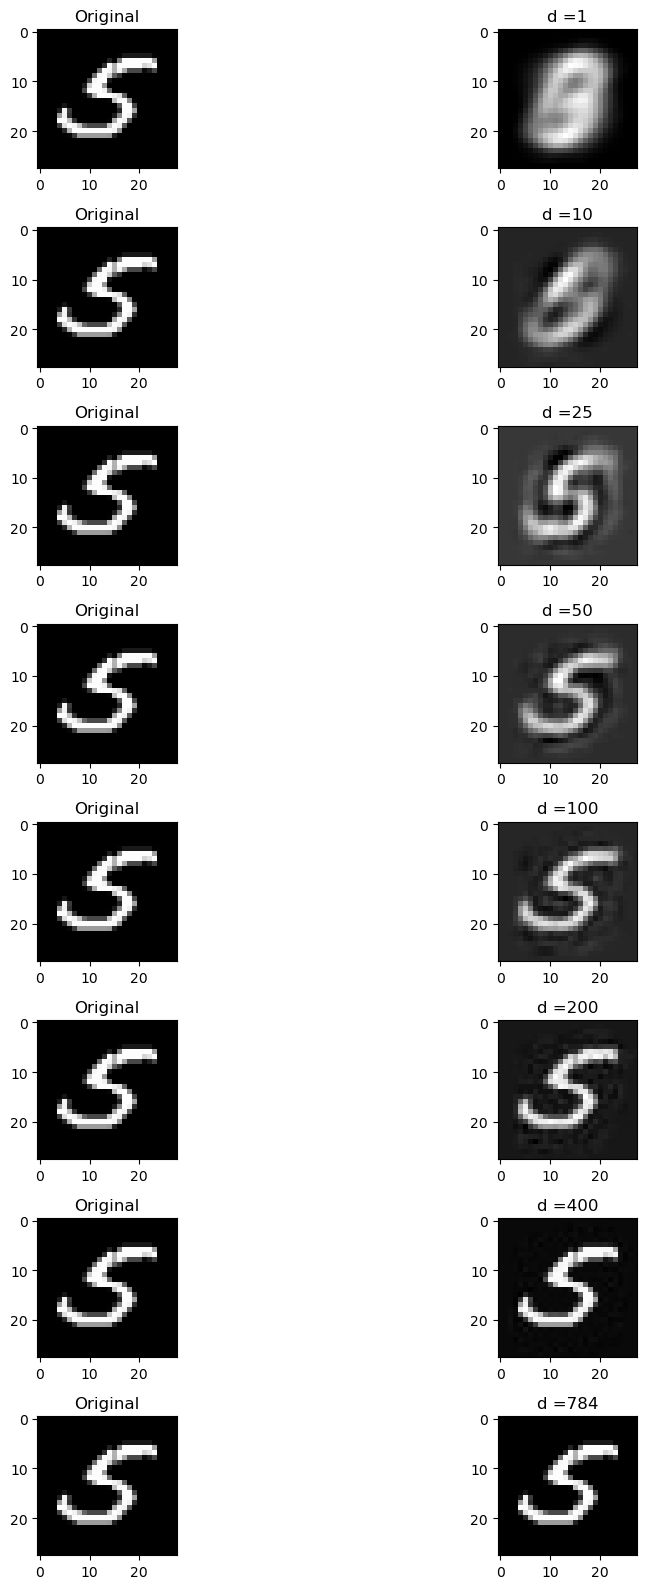

In [24]:
# Reconstructing the data for different values of d
d_array = np.array([1, 10, 25, 50, 100, 200, 400, 784])
fig = plt.figure(figsize = (12,16))
n = int(np.random.randint(0,1000))
for i in range(len(d_array)):
    reconstruct = reconstruct_data(data, data_eigenvectors, data_mean, d_array[i])
    plt.subplot(8,2,2*(i+1)-1)
    plt.imshow(data[:,n].reshape(28,28),cmap='gray')
    plt.title('Original')
    plt.subplot(8,2,2*(i+1))
    plt.imshow(reconstruct[:,n].reshape(28,28),cmap='gray')
    plt.title('d ='+str(d_array[i]))
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Total % Variance Explained by top d eigenvectors')

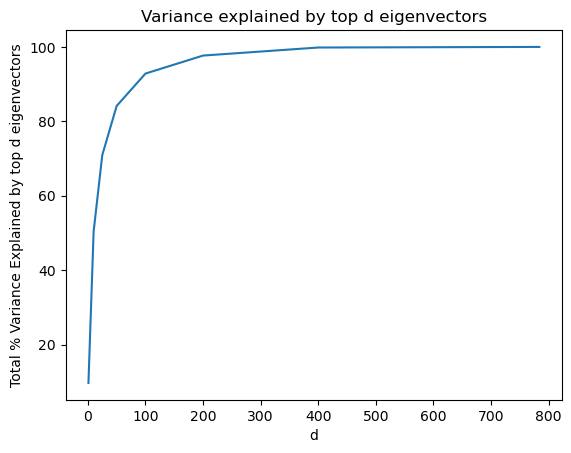

In [23]:
# Plotting the total % variance explained with respect to d(number of eigenvectors used to reconstruct the data)
total_variance_explained = np.zeros(len(d_array))
for i in range(len(d_array)):
    total_variance_explained[i] = (np.sum(data_eigenvalues[:d_array[i]])/np.sum(data_eigenvalues))*100    
plt.plot(d_array, total_variance_explained)
plt.title("Variance explained by top d eigenvectors")
plt.xlabel("d")
plt.ylabel("Total % Variance Explained by top d eigenvectors")

In [25]:
# picking the dimension that explains 95% of the variance ()
sum = int(np.sum(data_eigenvalues))
curr = 0
for i in range(len(data_eigenvalues)):
    if(curr/sum > 0.95):
        d = i
        break
    curr += data_eigenvalues[i]
print(d)

113


In [26]:
# d = 113 is best suited to reconstruct the data as it explains 95% of the variance, 
# which is enough to capture the important features of the data

In [27]:
data_eigenvalues

array([ 4.99918718e+00,  3.83865613e+00,  3.57358894e+00,  2.80561884e+00,
        2.51898635e+00,  2.35717457e+00,  1.80224852e+00,  1.56457447e+00,
        1.44522321e+00,  1.11070246e+00,  1.04837478e+00,  9.83588233e-01,
        9.42578376e-01,  8.85484107e-01,  8.44349329e-01,  7.79334871e-01,
        6.70408223e-01,  6.55856714e-01,  6.40956001e-01,  6.00211795e-01,
        5.56570501e-01,  5.21392250e-01,  4.97528624e-01,  4.89161849e-01,
        4.64320967e-01,  4.40638474e-01,  4.10271940e-01,  3.95468068e-01,
        3.73331267e-01,  3.54418301e-01,  3.51881562e-01,  3.32420190e-01,
        3.27521191e-01,  3.00570254e-01,  2.83353007e-01,  2.74168320e-01,
        2.66228774e-01,  2.63722233e-01,  2.46104883e-01,  2.42497404e-01,
        2.27054256e-01,  2.23797754e-01,  2.14268049e-01,  2.03711365e-01,
        1.96523873e-01,  1.89763056e-01,  1.86922341e-01,  1.79601783e-01,
        1.76347982e-01,  1.67263822e-01,  1.59668630e-01,  1.56244759e-01,
        1.53226473e-01,  

KERNEL PCA

Defining Functions

In [17]:
# function to calculate K Matrix of the dataset given by the polynomial kernel
# We are mean centering the K kernel as well
def polynomial_kernel(data, p):
    
    # calculating u dot u term for the K matrix
    uTu = 0
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            uTu += ((1 + np.dot(data[:,i], data[:,j]))**p)/(data.shape[1]**2)
            

    K = np.zeros((data.shape[1],data.shape[1]))
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            
                
            K[i,j] = (1 + np.dot(data[:,i], data[:,j]))**p 
    
    k1 = np.zeros((data.shape[1], data.shape[1]))
    k2 = np.zeros((data.shape[1], data.shape[1]))
    for i in range(data.shape[1]):
        k1[i,:] = np.full(data.shape[1], np.sum(K[i,:])/data.shape[1])
        k2[:,i] = np.full(data.shape[1], np.sum(K[:,i])/data.shape[1])
    K = K - k1 - k2 + uTu
    return K

In [18]:
# function to calculate K Matrix of the dataset given by X.T @ X
def radial_kernel(data, sigma):
    
    # calculating u dot u term for the K matrix
    uTu = 0
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            uTu += np.exp(-np.linalg.norm(data[:,i] - data[:,j])**2/(2*sigma**2))/(data.shape[1]**2)
            
    K = np.zeros((data.shape[1],data.shape[1]))
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            K[i,j] = np.exp(-np.linalg.norm(data[:,i] - data[:,j])**2/(2*sigma**2))
    
    
    k1 = np.zeros((data.shape[1], data.shape[1]))
    k2 = np.zeros((data.shape[1], data.shape[1]))
    for i in range(data.shape[1]):
        k1[i,:] = np.full(data.shape[1], np.sum(K[i,:])/data.shape[1])
        k2[:,i] = np.full(data.shape[1], np.sum(K[:,i])/data.shape[1])
    K = K - k1 - k2 + uTu
    return K

In [19]:
# function to calculate eigenvectors and eigenvales of the K matrix
def cal_eigen_K(K):
    # calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(K)
    # sort the eigenvectors and eigenvalues in descending order
    eigenvalues, eigenvectors = bubble_sort(eigenvalues, eigenvectors)
    # return the eigenvalues, eigenvectors, and mean
    return eigenvalues, eigenvectors

In [20]:
def cal_projection(K,eigenvalues, eigenvectors, d):
    # calculating the eigenvectors of phi @ phi.T using the eigenvectors of K
    alpha = np.zeros((eigenvectors.shape[0], eigenvectors.shape[1]))
    for i in range(eigenvectors.shape[1]):
        alpha[:,i] = (1/np.sqrt(eigenvalues[i]))*eigenvectors[:,i]
    
    projection = np.zeros((alpha.shape[0],d))
    for val in range(d):
        for i in range(K.shape[0]):
            projection[i,val] = np.dot(K[i,:], alpha[:,val])
    return projection

Performing experiments for different powers of kernel

In [15]:
p_array = [2,3,4]

C:\Users\Pratham Sunkad\AppData\Local\Temp\ipykernel_30568\633801443.py:5: RuntimeWarning: invalid value encountered in sqrt
  alpha[:,i] = (1/np.sqrt(eigenvalues[i]))*eigenvectors[:,i]


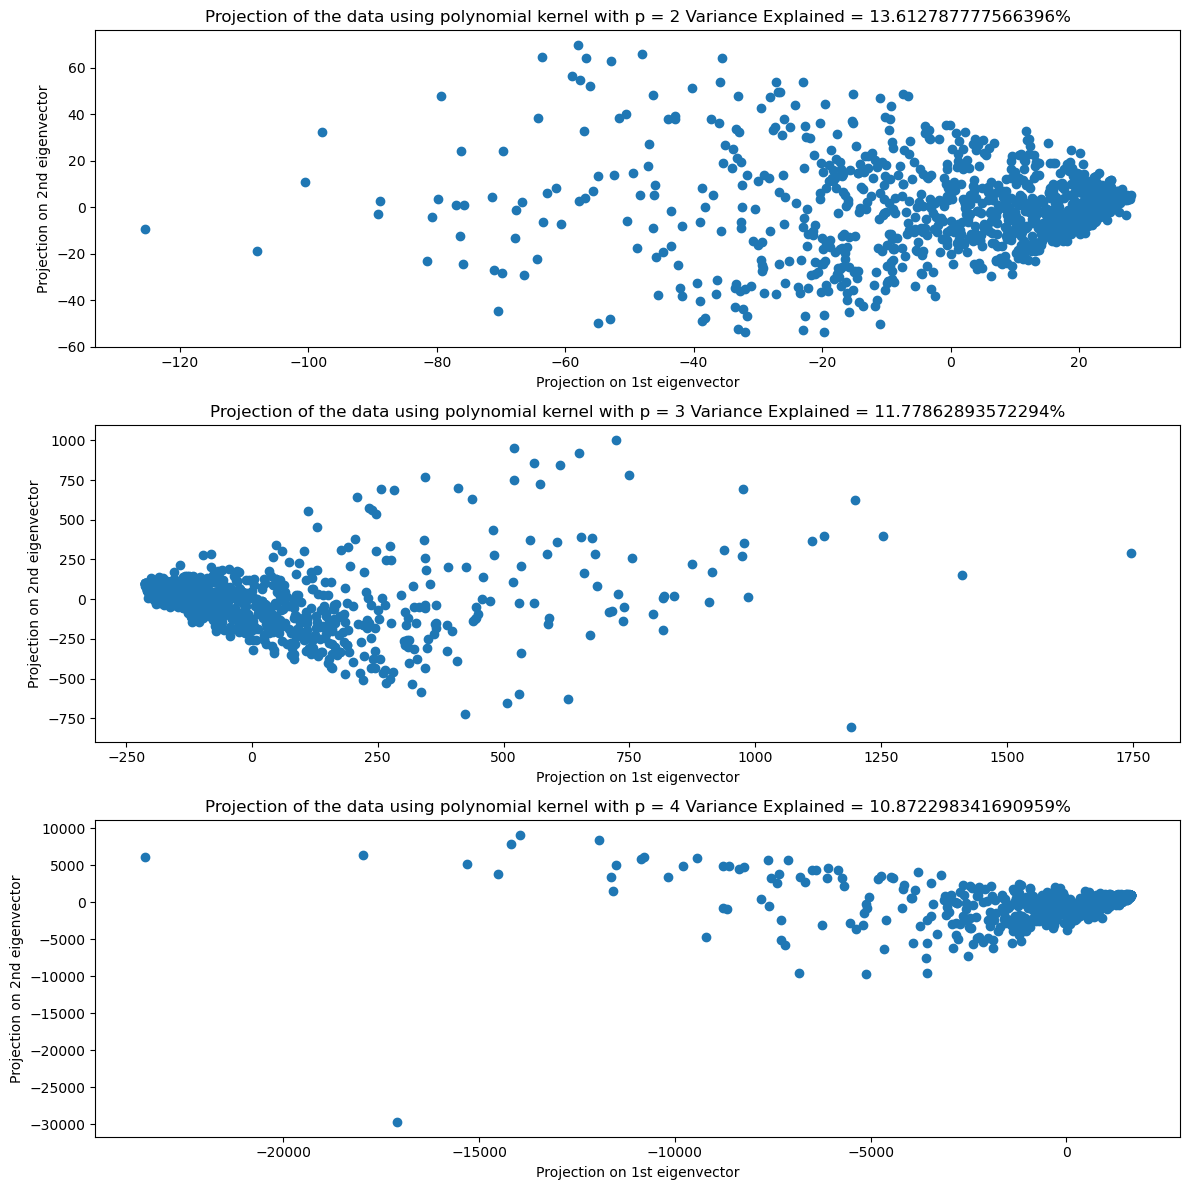

In [24]:
fig = plt.figure(figsize = (12,12))
for p in p_array:
    K = polynomial_kernel(data, p)
    K_eigenvalues, K_eigenvectors = cal_eigen_K(K)
    projection = cal_projection(K, K_eigenvalues, K_eigenvectors, 2)
    plt.subplot(len(p_array),1,p_array.index(p)+1)
    plt.scatter(projection[:,0], projection[:,1])

    plt.title('Projection of the data using polynomial kernel with p = '+str(p)+' Variance Explained = '+str((np.sum(K_eigenvalues[:2])/np.sum(K_eigenvalues))*100) + '%')
    plt.xlabel('Projection on 1st eigenvector')
    plt.ylabel('Projection on 2nd eigenvector')
    
plt.tight_layout()
plt.show()

Plotting Class wise values of the projection as well

C:\Users\Pratham Sunkad\AppData\Local\Temp\ipykernel_30568\633801443.py:5: RuntimeWarning: invalid value encountered in sqrt
  alpha[:,i] = (1/np.sqrt(eigenvalues[i]))*eigenvectors[:,i]


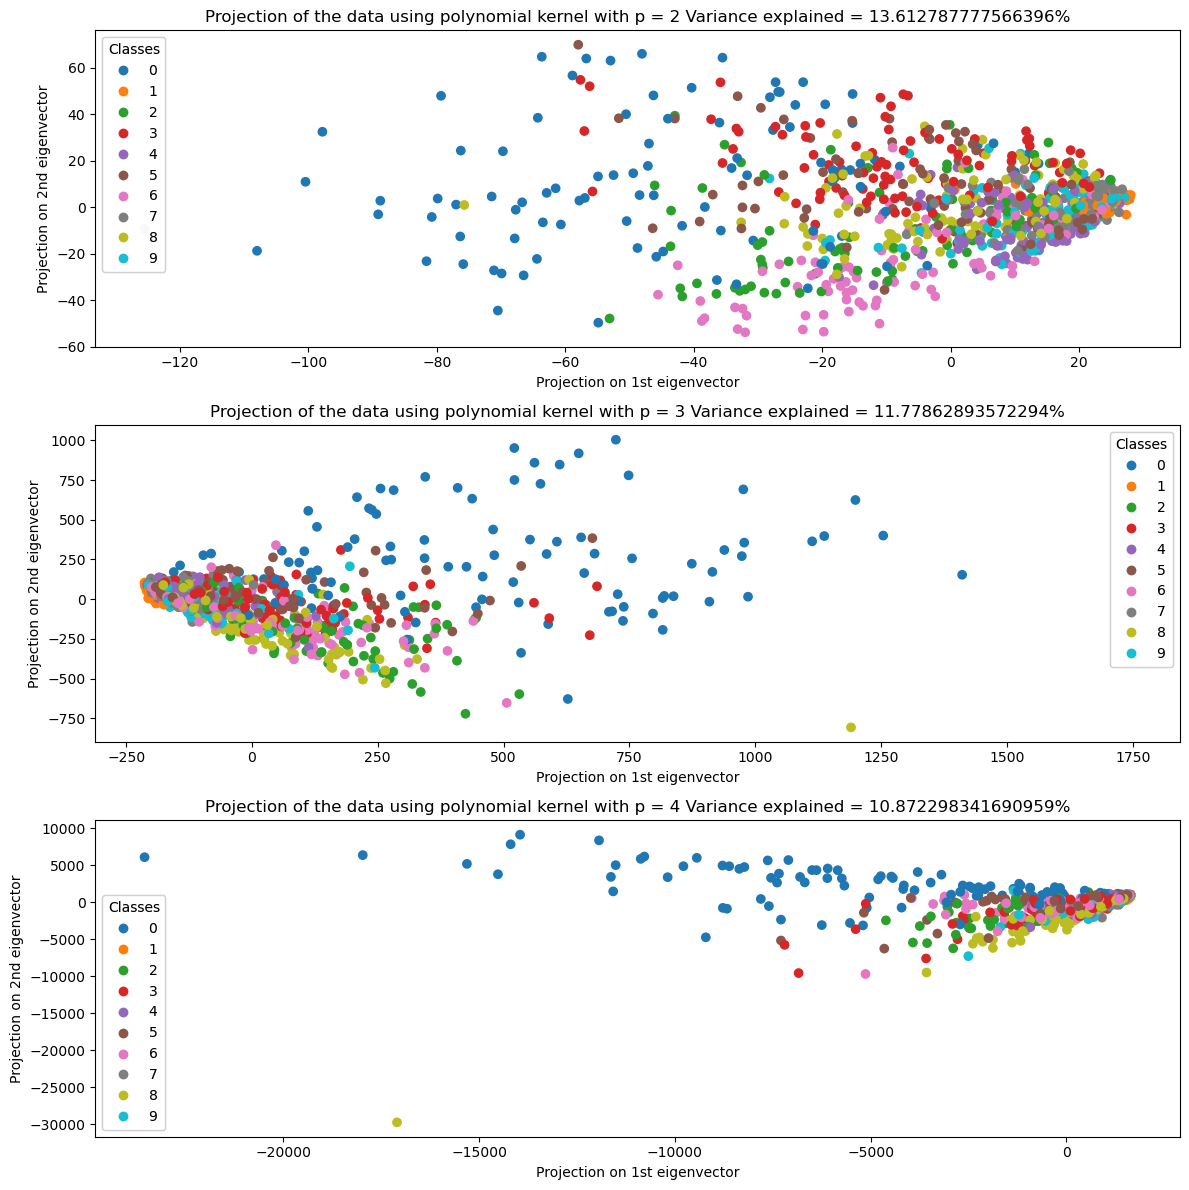

In [25]:
fig = plt.figure(figsize = (12,12))
for p in p_array:
    K = polynomial_kernel(data, p)
    K_eigenvalues, K_eigenvectors = cal_eigen_K(K)
    projection = cal_projection(K, K_eigenvalues, K_eigenvectors, 2)
    plt.subplot(len(p_array),1,p_array.index(p)+1)
    scatter = plt.scatter(projection[:,0], projection[:,1], c = label, cmap = 'tab10')
    
    # Create legend from unique labels
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend1)
    
    plt.title('Projection of the data using polynomial kernel with p = '+str(p)+' Variance explained = '+str((np.sum(K_eigenvalues[:2])/np.sum(K_eigenvalues))*100) + '%')
    plt.xlabel('Projection on 1st eigenvector')
    plt.ylabel('Projection on 2nd eigenvector')
    
plt.tight_layout()
plt.show()

Performing Experiments for Different values of Sigma for Radial Basis Kernel

Plots for sigma = 1, 2, 3, 4, 5, 10

In [26]:
sigma_array = [1, 2, 3, 4, 5, 10]

C:\Users\Pratham Sunkad\AppData\Local\Temp\ipykernel_25660\633801443.py:5: RuntimeWarning: invalid value encountered in sqrt
  alpha[:,i] = (1/np.sqrt(eigenvalues[i]))*eigenvectors[:,i]


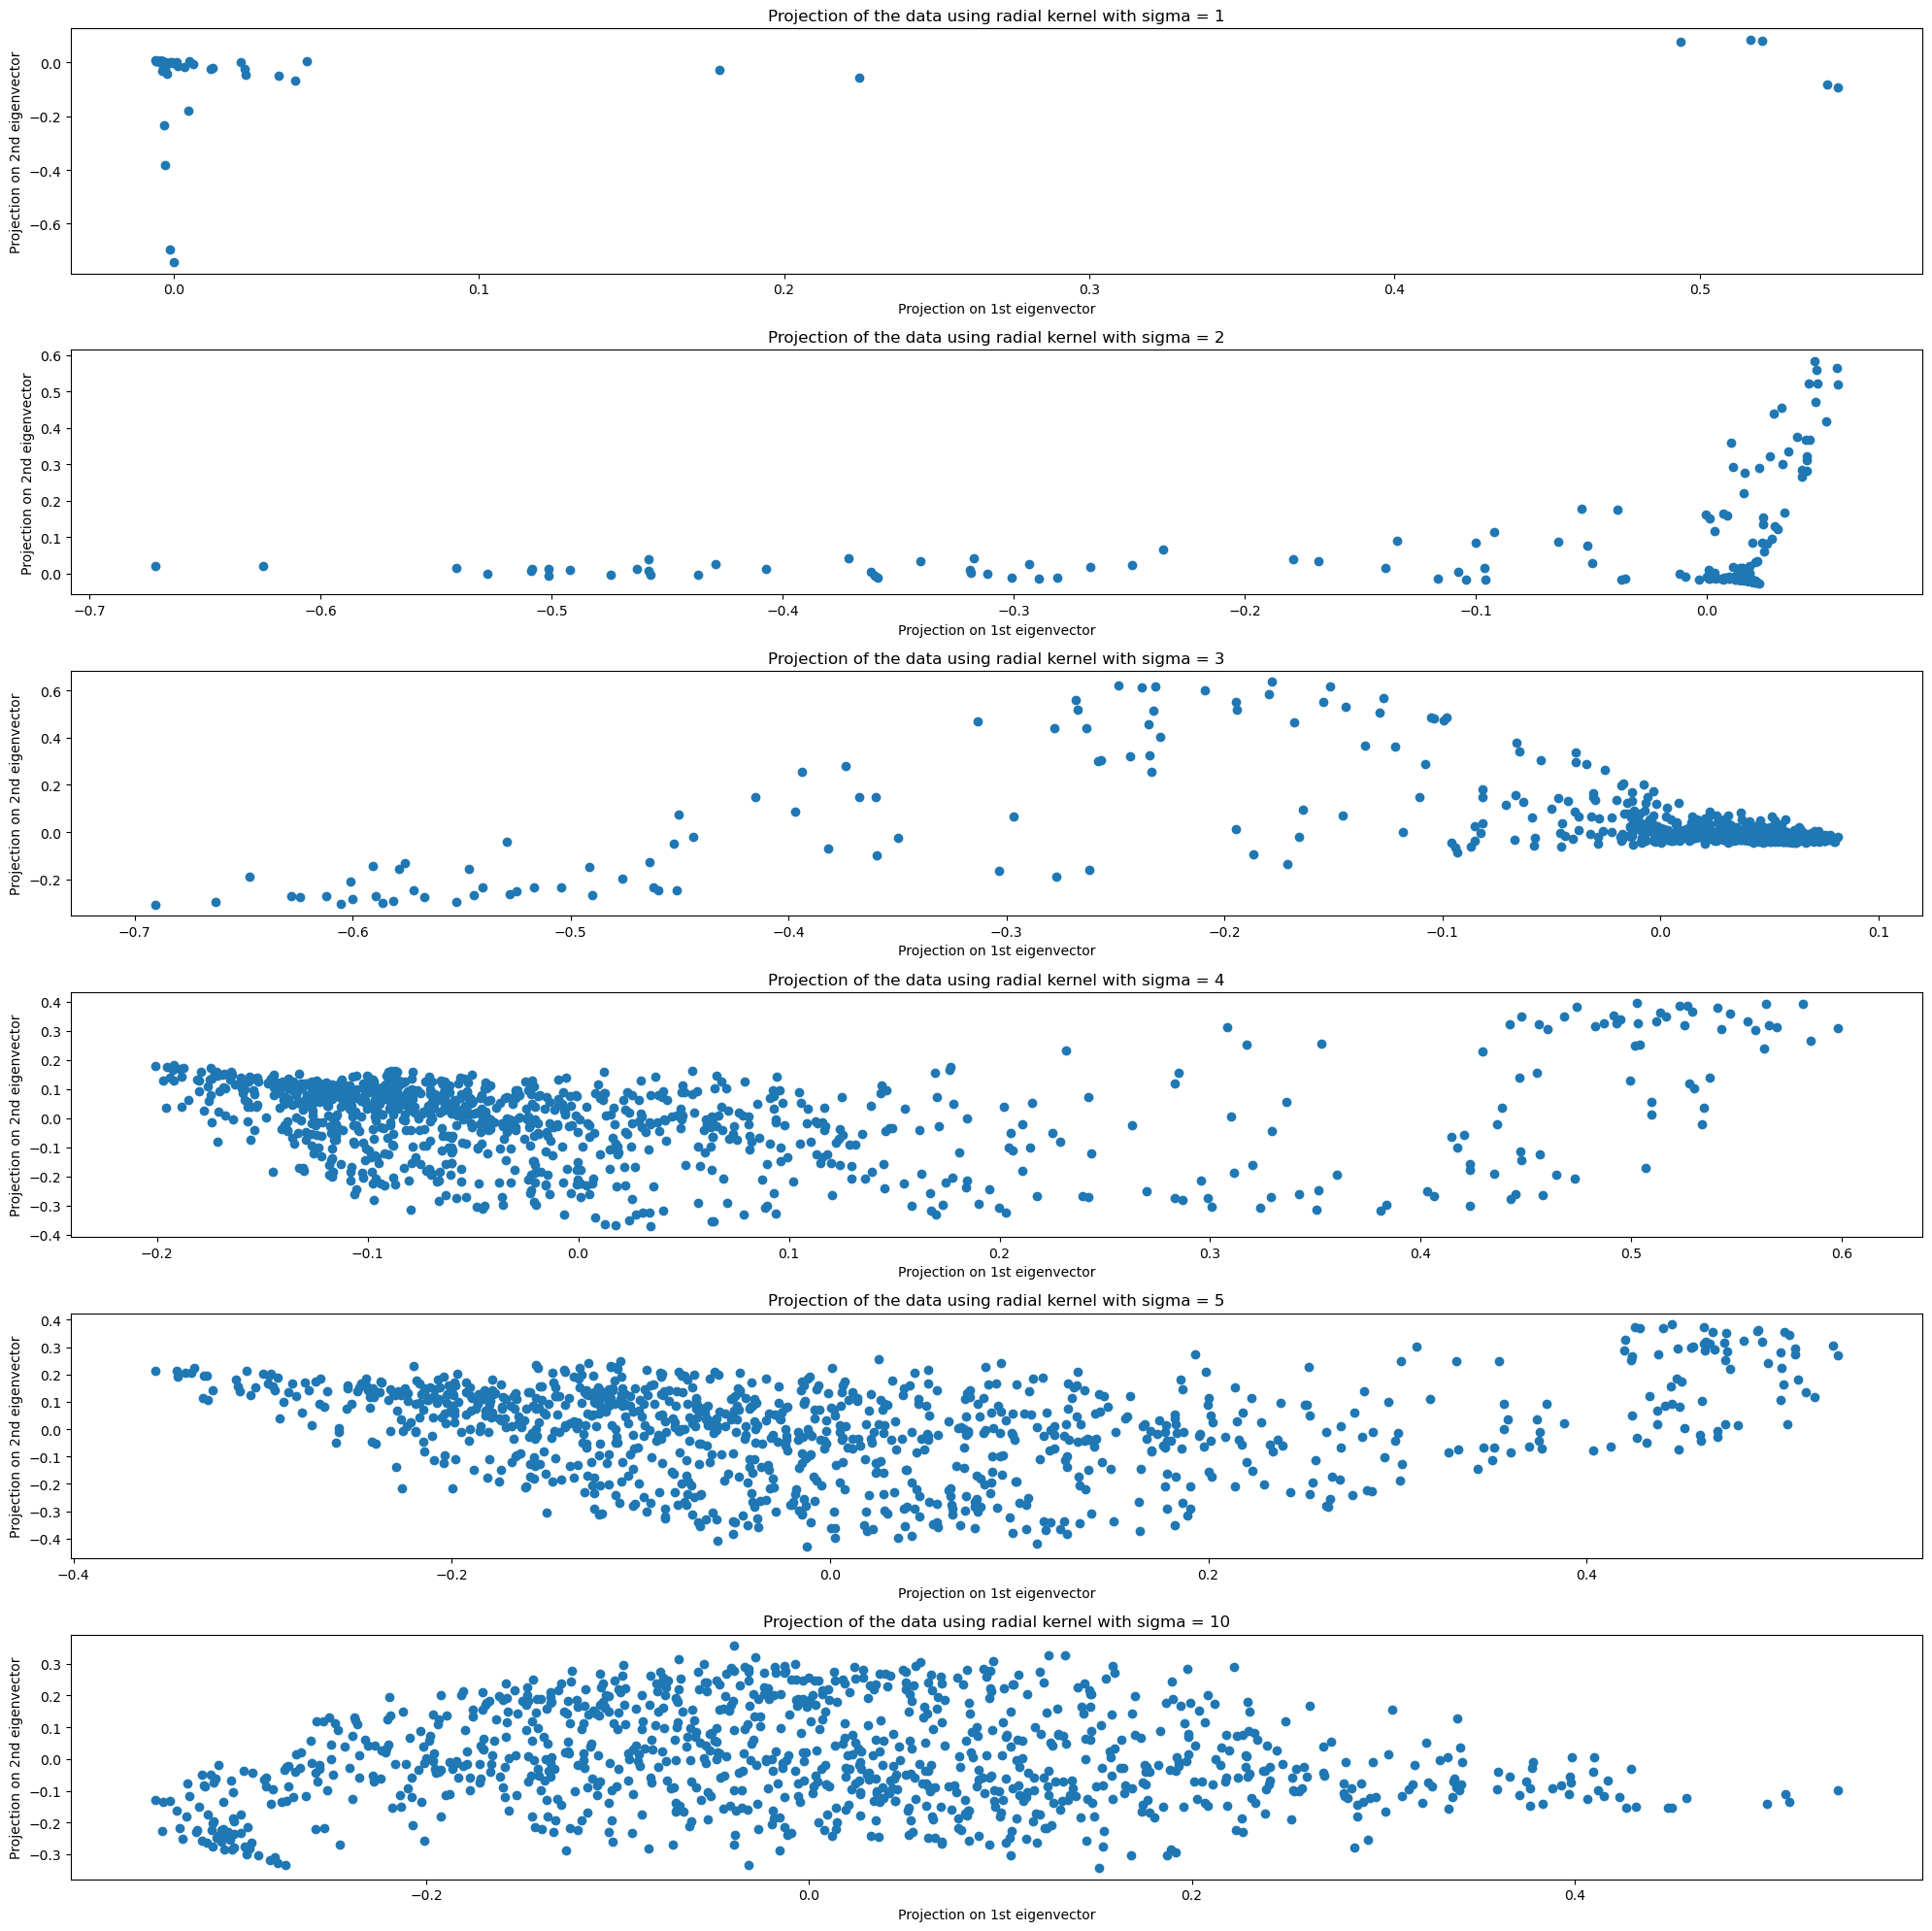

In [39]:
fig = plt.figure(figsize = (20,20))
for s in sigma_array:
    K = radial_kernel(data, s)
    K_eigenvalues, K_eigenvectors = cal_eigen_K(K)
    projection = cal_projection(K, K_eigenvalues, K_eigenvectors, 2)
    plt.subplot(len(sigma_array),1,sigma_array.index(s)+1)
    plt.scatter(projection[:,0], projection[:,1])
    plt.title('Projection of the data using radial kernel with sigma = '+str(s))
    plt.xlabel('Projection on 1st eigenvector')
    plt.ylabel('Projection on 2nd eigenvector')
    
plt.tight_layout()
plt.show()

Plotting Class wise values of the projection as well

C:\Users\Pratham Sunkad\AppData\Local\Temp\ipykernel_30568\633801443.py:5: RuntimeWarning: invalid value encountered in sqrt
  alpha[:,i] = (1/np.sqrt(eigenvalues[i]))*eigenvectors[:,i]


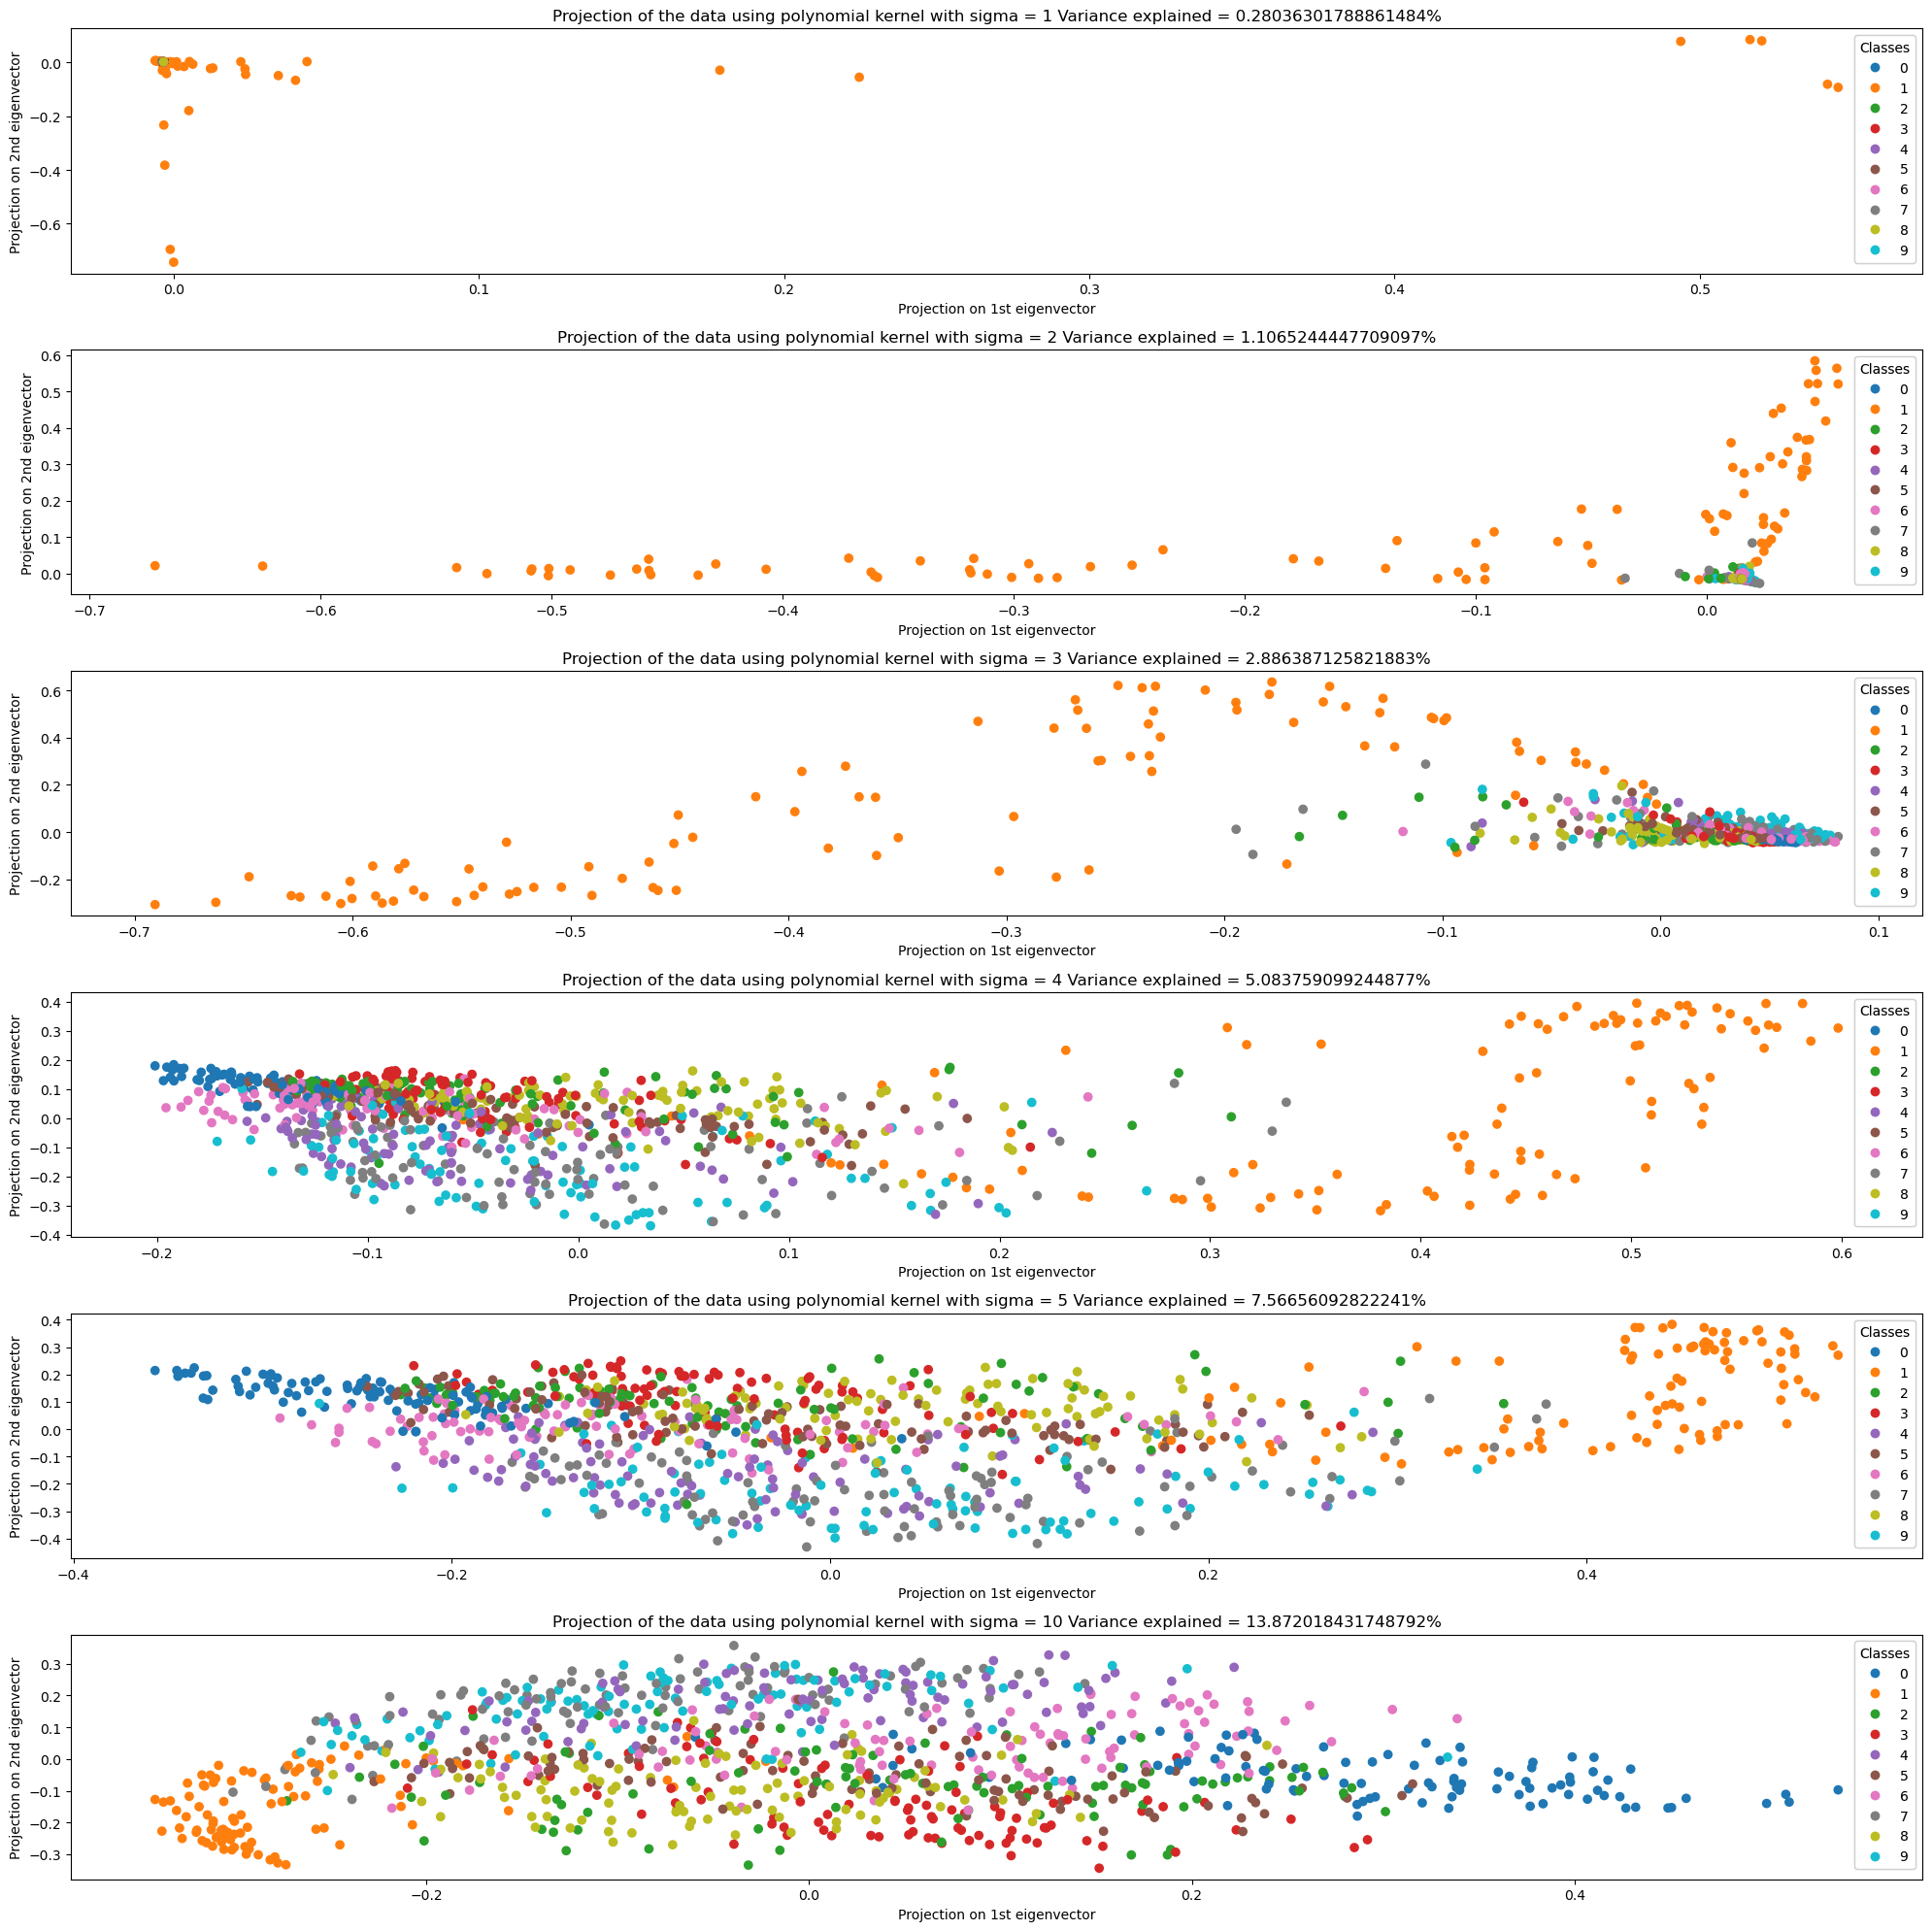

In [27]:
fig = plt.figure(figsize = (20,20))
for s in sigma_array:
    K = radial_kernel(data, s)
    K_eigenvalues, K_eigenvectors = cal_eigen_K(K)
    projection = cal_projection(K, K_eigenvalues, K_eigenvectors, 2)
    plt.subplot(len(sigma_array),1,sigma_array.index(s)+1)
    scatter = plt.scatter(projection[:,0], projection[:,1], c = label, cmap = 'tab10')
    
    # Create legend from unique labels
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend1)
    
    plt.title('Projection of the data using polynomial kernel with sigma = '+str(s)+' Variance explained = '+str((np.sum(K_eigenvalues[:2])/np.sum(K_eigenvalues))*100) + '%')
    plt.xlabel('Projection on 1st eigenvector')
    plt.ylabel('Projection on 2nd eigenvector')
    
plt.tight_layout()
plt.show()

Sigma = 10 is the winner here! as it captures the highest variance